In [38]:
# imported nana tanan ayaw na pag import pisti yawa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import DBSCAN

PCA Loadings (Principal Components):
      components.co  components.no  components.no2  components.o3  components.so2  components.pm2_5  components.pm10  components.nh3
PCA1       0.427983       0.296346        0.395989      -0.004530        0.381682          0.409917         0.416289        0.291843
PCA2      -0.072605      -0.187991       -0.108557       0.870899        0.133768          0.212581         0.196531       -0.295686

City with the highest PCA1:
Cluster     2.000000
PCA1       26.147188
PCA2       -2.509372

City with the lowest PCA1:
Cluster    0.000000
PCA1      -1.510300
PCA2       0.111146

City with the highest PCA2:
Cluster     4.000000
PCA1       11.734554
PCA2       13.474754

City with the lowest PCA2:
Cluster    3.000000
PCA1       3.466770
PCA2      -3.702283


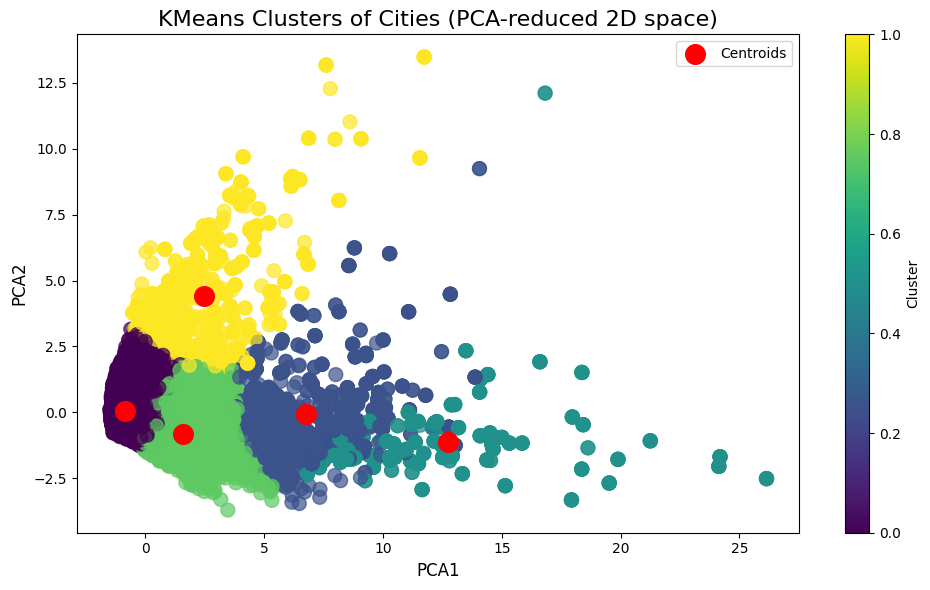

In [53]:
# Load the data
file_path = '202408_CombinedData.csv'
df = pd.read_csv(file_path)

# Convert to datetime (if needed for future use)
df['datetime'] = pd.to_datetime(df['datetime'])

# Group by 'city_name' and calculate the mean for each pollutant
city_grouped = df.groupby('datetime')[[
    "components.co", "components.no", "components.no2", "components.o3", 
    "components.so2", "components.pm2_5", "components.pm10", "components.nh3"
]].mean()

# Standardize the data (important for KMeans)
scaler = StandardScaler()
var_scaled = scaler.fit_transform(city_grouped)

# Apply KMeans clustering (5 clusters)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
city_grouped['Cluster'] = kmeans.fit_predict(var_scaled)

# Apply PCA for dimensionality reduction (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(var_scaled)

# Add the PCA components to the DataFrame
city_grouped['PCA1'] = pca_components[:, 0]
city_grouped['PCA2'] = pca_components[:, 1]

# After performing PCA, let's print the loadings for PCA1 and PCA2
print("PCA Loadings (Principal Components):")
columns = ["components.co", "components.no", "components.no2", "components.o3", 
           "components.so2", "components.pm2_5", "components.pm10", "components.nh3"]

# PCA components (loadings)
loadings = pca.components_

# Create a DataFrame to better visualize the loadings
loadings_df = pd.DataFrame(loadings, columns=columns, index=["PCA1", 'PCA2'])

print(loadings_df.to_string())

# Find the city with the highest PCA1
highest_pca1_city = city_grouped.loc[city_grouped['PCA1'].idxmax(), ['Cluster', 'PCA1', 'PCA2']]
lowest_pca1_city = city_grouped.loc[city_grouped['PCA1'].idxmin(), ['Cluster', 'PCA1', 'PCA2']]

# Find the city with the lowest PCA2
highest_pca2_city = city_grouped.loc[city_grouped['PCA2'].idxmax(), ['Cluster', 'PCA1', 'PCA2']]
lowest_pca2_city = city_grouped.loc[city_grouped['PCA2'].idxmin(), ['Cluster', 'PCA1', 'PCA2']]

# Print results
print("\nCity with the highest PCA1:")
print(highest_pca1_city.to_string())

print("\nCity with the lowest PCA1:")
print(lowest_pca1_city.to_string())

print("\nCity with the highest PCA2:")
print(highest_pca2_city.to_string())

print("\nCity with the lowest PCA2:")
print(lowest_pca2_city.to_string())

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot each cluster in a different color
plt.scatter(city_grouped['PCA1'], city_grouped['PCA2'], c=city_grouped['Cluster'], cmap='viridis', s=100, alpha=0.7)

# Plot the centroids
centroids = kmeans.cluster_centers_  # Get the centroids of the clusters
centroid_pca = pca.transform(centroids)  # Project centroids into the 2D PCA space

# Plot the centroids as larger red points
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], c='red', s=200, marker='o', label='Centroids')

# Add title and labels
plt.title("KMeans Clusters of Cities (PCA-reduced 2D space)", fontsize=16)
plt.xlabel("PCA1", fontsize=12)
plt.ylabel("PCA2", fontsize=12)

# Add color bar to show cluster labels
plt.colorbar(label='Cluster')

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()


Silhouette Score: 0.042918250433353546
Log-Likelihood: 3.3223730363799375
AIC: -226928.56586377017
BIC: -225037.88572711748

PCA Loadings:
      components.co  components.no  components.no2  components.o3  components.so2  components.pm2_5  components.pm10  components.nh3
PCA1       0.427983       0.296346        0.395989      -0.004530        0.381682          0.409917         0.416289        0.291843
PCA2      -0.072605      -0.187991       -0.108557       0.870899        0.133768          0.212581         0.196531       -0.295686

City with the highest PCA1:
city_name      Makati City
GMM_Cluster              2
PCA1             26.147188
PCA2             -2.509372

City with the lowest PCA1:
city_name       Talisay
GMM_Cluster           0
PCA1            -1.5103
PCA2           0.111146

City with the highest PCA2:
city_name      Makati City
GMM_Cluster              1
PCA1             11.734554
PCA2             13.474754

City with the lowest PCA2:
city_name       Cauayan
GMM_Cluster 

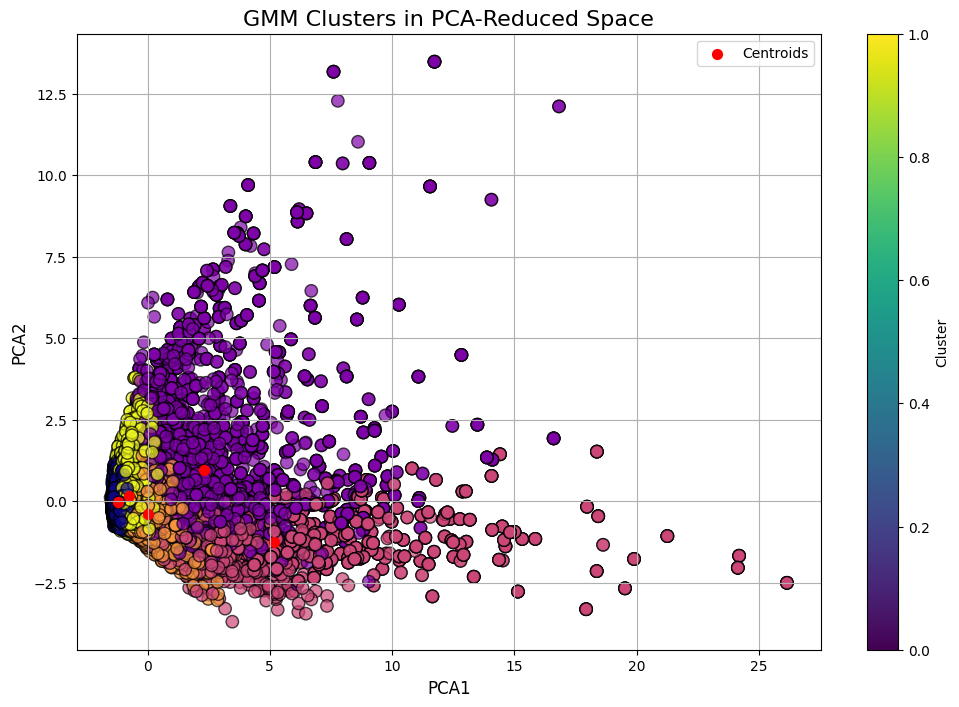

In [54]:
# Load and preprocess data
file_path = '202408_CombinedData.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values
data.dropna(inplace=True)

# Select relevant features for clustering
features = ["components.co", "components.no", "components.no2", "components.o3", 
            "components.so2", "components.pm2_5", "components.pm10", "components.nh3"]
var = data[features].values

# Standardize the data
scaler = StandardScaler()
var_scaled = scaler.fit_transform(var)

# Apply PCA for dimensionality reduction (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(var_scaled)
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

# Apply Gaussian Mixture Model (EM Clustering)
k = 5  # Number of clusters
gmm = GaussianMixture(n_components=k, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(var_scaled)

# Add cluster probabilities to the DataFrame
cluster_probs = gmm.predict_proba(var_scaled)
prob_cols = [f'Prob_Cluster_{i}' for i in range(gmm.n_components)]
prob_df = pd.DataFrame(cluster_probs, columns=prob_cols)
data = pd.concat([data, prob_df], axis=1)

# Evaluate the model
silhouette = silhouette_score(var_scaled, data['GMM_Cluster'])
log_likelihood = gmm.score(var_scaled)
aic = gmm.aic(var_scaled)
bic = gmm.bic(var_scaled)

print(f"Silhouette Score: {silhouette}")
print(f"Log-Likelihood: {log_likelihood}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")

# Optional: Compare with K-means clusters if available
# Uncomment if `Cluster` column from K-means exists in your data
# ari_score = adjusted_rand_score(data['Cluster'], data['GMM_Cluster'])
# print(f"Adjusted Rand Index (K-means vs GMM): {ari_score}")

# PCA loadings (feature contributions to PCA1 and PCA2)
loadings_df = pd.DataFrame(pca.components_, columns=features, index=["PCA1", "PCA2"])
print("\nPCA Loadings:")
print(loadings_df.to_string())

# Analyze extreme cities based on PCA1 and PCA2
highest_pca1_city = data.loc[data['PCA1'].idxmax(), ['city_name', 'GMM_Cluster', 'PCA1', 'PCA2']]
lowest_pca1_city = data.loc[data['PCA1'].idxmin(), ['city_name', 'GMM_Cluster', 'PCA1', 'PCA2']]
highest_pca2_city = data.loc[data['PCA2'].idxmax(), ['city_name', 'GMM_Cluster', 'PCA1', 'PCA2']]
lowest_pca2_city = data.loc[data['PCA2'].idxmin(), ['city_name', 'GMM_Cluster', 'PCA1', 'PCA2']]

print("\nCity with the highest PCA1:")
print(highest_pca1_city.to_string())
print("\nCity with the lowest PCA1:")
print(lowest_pca1_city.to_string())
print("\nCity with the highest PCA2:")
print(highest_pca2_city.to_string())
print("\nCity with the lowest PCA2:")
print(lowest_pca2_city.to_string())

# Visualize GMM Clusters in PCA space
plt.figure(figsize=(12, 8))
plt.scatter(data['PCA1'], data['PCA2'], c=data['GMM_Cluster'], cmap='plasma', s=80, alpha=0.7, edgecolors='k')

# Plot cluster centroids (means of Gaussian components in PCA space)
gmm_centroids = gmm.means_  # GMM means in original space
gmm_centroids_pca = pca.transform(gmm_centroids)  # Project into PCA space
plt.scatter(gmm_centroids_pca[:, 0], gmm_centroids_pca[:, 1], c='red', s=50, marker='o', label='Centroids')

# Add annotations for extreme points
# for i, row in data.iterrows():
#     if abs(row['PCA1']) > 5 or abs(row['PCA2']) > 5:  # Customize threshold
#         plt.text(row['PCA1'], row['PCA2'], row['city_name'], fontsize=8)

# Add title, labels, and legend
plt.title("GMM Clusters in PCA-Reduced Space", fontsize=16)
plt.xlabel("PCA1", fontsize=12)
plt.ylabel("PCA2", fontsize=12)
plt.colorbar(label='Cluster')
plt.legend()
plt.grid()
plt.show()


Number of noise points: 2585


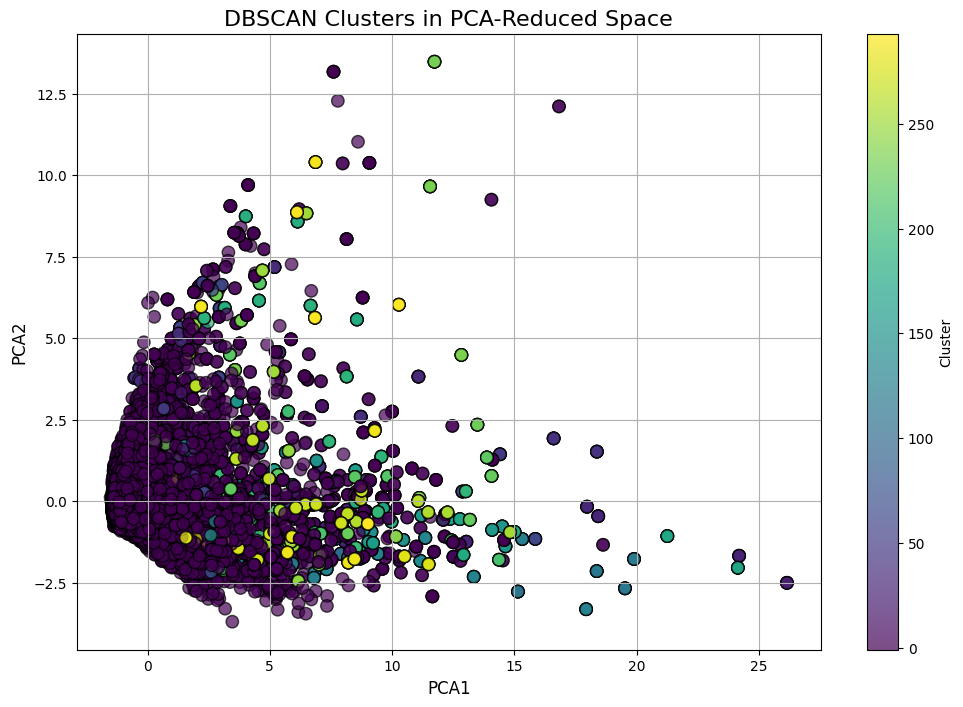

In [55]:

# Load and preprocess data
file_path = '202408_CombinedData.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values
data.dropna(inplace=True)

# Select relevant features for clustering
features = ["components.co", "components.no", "components.no2", "components.o3", 
            "components.so2", "components.pm2_5", "components.pm10", "components.nh3"]
var = data[features].values

# Standardize the data
scaler = StandardScaler()
var_scaled = scaler.fit_transform(var)

# Apply PCA for dimensionality reduction (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(var_scaled)
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

# Apply DBSCAN clustering
# eps: maximum distance for points to be considered neighbors
# min_samples: minimum number of points in a neighborhood to be considered a core point
dbscan = DBSCAN(eps=0.5, min_samples=5)  # These parameters may need tuning based on your data
data['DBSCAN_Cluster'] = dbscan.fit_predict(var_scaled)

# DBSCAN assigns -1 for noise points
print(f"Number of noise points: {sum(data['DBSCAN_Cluster'] == -1)}")

# Visualize DBSCAN clusters in PCA-reduced space
plt.figure(figsize=(12, 8))

# Scatter plot with colors representing DBSCAN clusters (Noise points are labeled -1)
plt.scatter(data['PCA1'], data['PCA2'], c=data['DBSCAN_Cluster'], cmap='viridis', s=80, alpha=0.7, edgecolors='k')

# Add title and labels
plt.title("DBSCAN Clusters in PCA-Reduced Space", fontsize=16)
plt.xlabel("PCA1", fontsize=12)
plt.ylabel("PCA2", fontsize=12)
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


Number of noise points: 2585


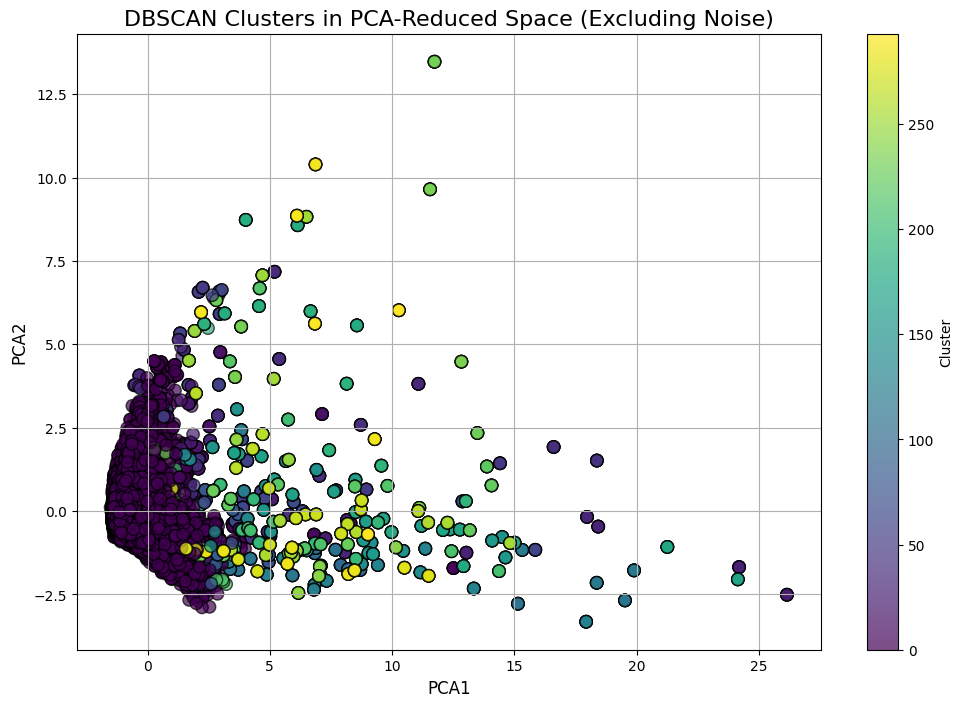

In [56]:

# Load and preprocess data
file_path = '202408_CombinedData.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values
data.dropna(inplace=True)

# Select relevant features for clustering
features = ["components.co", "components.no", "components.no2", "components.o3", 
            "components.so2", "components.pm2_5", "components.pm10", "components.nh3"]
var = data[features].values

# Standardize the data
scaler = StandardScaler()
var_scaled = scaler.fit_transform(var)

# Apply PCA for dimensionality reduction (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(var_scaled)
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # These parameters may need tuning based on your data
data['DBSCAN_Cluster'] = dbscan.fit_predict(var_scaled)

# DBSCAN assigns -1 for noise points
print(f"Number of noise points: {sum(data['DBSCAN_Cluster'] == -1)}")

# Exclude noise points (DBSCAN cluster label -1)
filtered_data = data[data['DBSCAN_Cluster'] != -1]

# Visualize DBSCAN clusters in PCA-reduced space excluding noise points
plt.figure(figsize=(12, 8))

# Scatter plot with colors representing DBSCAN clusters (Noise points are excluded)
plt.scatter(filtered_data['PCA1'], filtered_data['PCA2'], c=filtered_data['DBSCAN_Cluster'], cmap='viridis', s=80, alpha=0.7, edgecolors='k')

# Add title and labels
plt.title("DBSCAN Clusters in PCA-Reduced Space (Excluding Noise)", fontsize=16)
plt.xlabel("PCA1", fontsize=12)
plt.ylabel("PCA2", fontsize=12)
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# Optional: You can also analyze the clusters or print information about the filtered data
# for cluster_id in np.unique(filtered_data['DBSCAN_Cluster']):
#     print(f"\nCluster {cluster_id}:")
#     print(filtered_data[filtered_data['DBSCAN_Cluster'] == cluster_id].describe())
